In [1]:
import pandas as pd
import scipy as sc
import glob
import os
import numpy as np

import matplotlib.pyplot as plt

import parmed as pmd
import pytraj as pt

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import plotting

In [5]:
smirnoff = pt.load("../smirnoff-host-guest-simulations/systems/b-mch-p/smirnoff/a000/prod.*.nc",
                        "../smirnoff-host-guest-simulations/systems/b-mch-p/smirnoff/a000/vac.prmtop")

In [6]:
smirnoff_rmsd = pt.analysis.rmsd.rmsd(smirnoff, ":MGO")

In [7]:
gaff = pt.load("/home/dslochower/niel/projects/cds/wat6/bgbg-tip3p/b-mch-p/a00/traj*",
               "/home/dslochower/niel/projects/cds/wat6/bgbg-tip3p/b-mch-p/a00/vac.topo")

In [8]:
gaff_rmsd = pt.analysis.rmsd.rmsd(gaff, ":MGO")

We have different spacing between frames, but we both ran to 1 us and analyzed the RMSD at every frame.

In [9]:
smirnoff_time = np.linspace(0, 1000, len(smirnoff_rmsd))
gaff_time = np.linspace(0, 1000, len(gaff_rmsd))

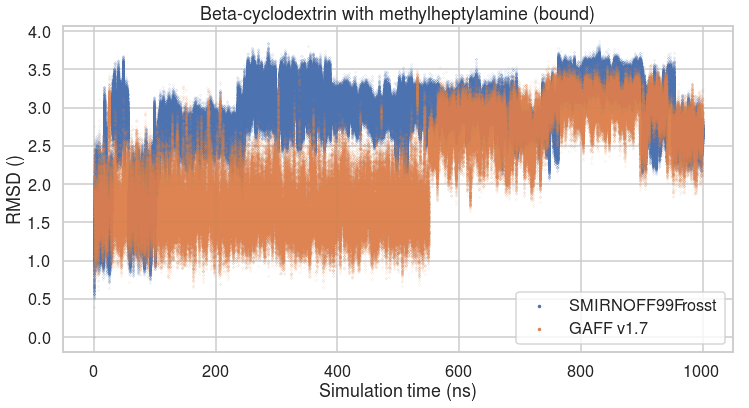

In [10]:
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.scatter(smirnoff_time, smirnoff_rmsd, label="SMIRNOFF99Frosst",  s=0.01)
plt.scatter(gaff_time, gaff_rmsd, label="GAFF v1.7",  s=0.01)
ax.set_title("Beta-cyclodextrin with methylheptylamine (bound)")
ax.set_ylabel(r"RMSD ($\AA{}$)")
ax.set_xlabel("Simulation time (ns)")
legend = ax.legend(markerscale=20)

## Unbound state

This will report fluctuations in free CD.

In [3]:
smirnoff_unbound = pt.iterload("../smirnoff-host-guest-simulations/systems/b-mch-p/smirnoff/p045/prod.*.nc",
                        "../smirnoff-host-guest-simulations/systems/b-mch-p/smirnoff/p045/vac.prmtop")

smirnoff_unbound_rmsd = pt.analysis.rmsd.rmsd(smirnoff_unbound, ":MGO")

In [4]:
gaff_unbound = pt.iterload("/home/dslochower/niel/projects/cds/wat6/bgbg-tip3p/b-mch-p/r00/traj*",
               "/home/dslochower/niel/projects/cds/wat6/bgbg-tip3p/b-mch-p/r00/vac.topo")

gaff_unbound_rmsd = pt.analysis.rmsd.rmsd(gaff_unbound, ":MGO")

In [5]:
smirnoff_time = np.linspace(0, 1000, len(smirnoff_unbound_rmsd))
gaff_time = np.linspace(0, 1000, len(gaff_unbound_rmsd))

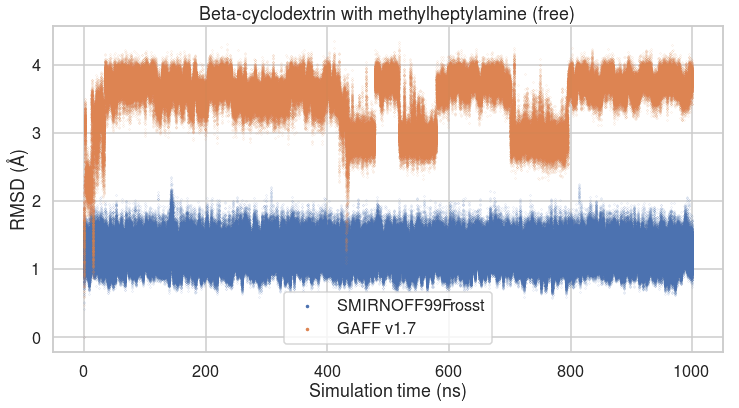

In [6]:
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.scatter(smirnoff_time, smirnoff_unbound_rmsd, label="SMIRNOFF99Frosst",  s=0.01)
plt.scatter(gaff_time, gaff_unbound_rmsd, label="GAFF v1.7",  s=0.01)
ax.set_title("Beta-cyclodextrin with methylheptylamine (free)")
ax.set_ylabel(r"RMSD ($\text{\AA}$)")
ax.set_xlabel("Simulation time (ns)")
legend = ax.legend(markerscale=20)

In [8]:
len(smirnoff_unbound_rmsd)

1980000